# Overview of PyLandStats

In [ ]:
import swisslandstats as sls

import pylandstats as pls

Running the cell below is required so that:
- the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).
- the elevation zones vector data is downloaded and preprocessed (see [A04-elev-zones.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A04-elev-zones.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile lulc_tifs elev_zones

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-05-01T091003.648632.snakemake.log


## Landscape analysis

We can load landscapes from raster files and compute pandas data frames of patch, class and landscape level. See the notebook [01-landscape-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/01-landscape-analysis.ipynb) for more thorough demonstration.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepath = "../data/processed/veveyse-AS18_4.tif"

<Axes: >

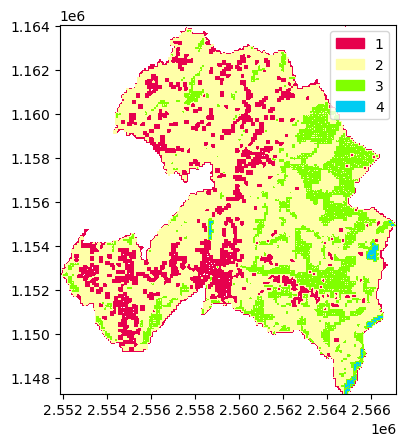

In [ ]:
ls = pls.Landscape(input_filepath)
ls.plot_landscape(cmap=sls.noas04_4_cmap, norm=sls.noas04_4_norm, legend=True)

In [ ]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,core_area,number_of_core_areas,core_area_index,euclidean_nearest_neighbor
patch_id,,,,,,,,,,
0,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,360.555128
1,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,360.555128
2,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,200.000000
3,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,200.000000
4,1,1.0,400.0,400.0,1.0,1.0,0.0,0,0.0,424.264069


In [ ]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,core_area_proportion_of_landscape,number_of_disjunct_core_areas,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,1041.0,7.749572,287,2.136529,1.421872,256600.0,19.102211,90.0,0.669992,20,...,223.606798,1100.000000,168.551251,54.504167,4.500000,20.400000,1.0,31.0,8.458723,187.971629
2,7559.0,56.271868,60,0.446661,44.807563,679700.0,50.599270,3121.0,23.233827,156,...,200.000000,624.621125,86.731582,37.860832,20.006410,413.846524,3.0,1012.0,88.765573,443.685656
3,4560.0,33.946252,243,1.808978,23.040274,512700.0,38.167200,1755.0,13.064840,82,...,223.606798,521.110255,77.749231,30.694542,21.402439,217.189174,3.0,441.0,64.732632,302.454463
4,273.0,2.032308,75,0.558327,0.528549,50000.0,3.722177,51.0,0.379662,9,...,360.555128,3124.154028,491.229708,88.856453,5.666667,11.627451,2.0,17.0,5.811865,102.562328


In [ ]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
0,13433.0,665,4.950495,44.807563,749500.0,55.795429,5017.0,267,18.273707,3461.884836,...,223.606798,3124.154028,225.342246,72.916524,18.790262,297.768958,3.0,1012.0,76.948844,409.514476


<a id='spatiotemporal-analysis'></a>
## Spatio-temporal analysis

Given a temporally-ordered sequence of landscape snapshots, we can also analyze the spatio-temporal patterns of landscape change. To that end, PyLandStats can compute pandas dataframes with the evolution of the metrics and plot them, both at the class and landscape level. See the notebook [02-spatiotemporal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/02-spatiotemporal-analysis.ipynb) for a more thorough demonstration.

In [ ]:
input_filepaths = [
    "../data/processed/veveyse-AS97R_4.tif",
    "../data/processed/veveyse-AS09R_4.tif",
    "../data/processed/veveyse-AS18_4.tif",
]
years = ["1992", "2004", "2012"]

In [ ]:
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)

In [ ]:
sta.compute_class_metrics_df()

[########################################] | 100% Completed | 1.05 ss


total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1992        794.0                 5.910817                309   
          2004        906.0                 6.744584                304   
          2012       1041.0                 7.749572                287   
2         1992       7805.0                58.103179                 54   
          2004       7692.0                57.261967                 54   
          2012       7559.0                56.271868                 60   
3         1992       4529.0                33.715477                228   
          2004       4553.0                33.894141                245   
          2012       4560.0                33.946252                243   
4         1992        305.0                 2.270528                 96   
          2004        282.0                 2.099308                 86   
          2012        273.0                 2.032308                 75   

                 patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2012        2.136529             1.421872    256600.0     19.102211   
2         1992        0.401995            46.460210    661200.0     49.222065   
          2004        0.401995            45.723219    671500.0     49.988833   
          2012        0.446661            44.807563    679700.0     50.599270   
3         1992        1.697313            23.003052    515000.0     38.338420   
          2004        1.823867            23.055163    514300.0     38.286310   
          2012        1.808978            23.040274    512700.0     38.167200   
4         1992        0.714658             0.550882     57600.0      4.287948   
          2004        0.640214             0.521105     51600.0      3.841286   
          2012        0.558327             0.528549     50000.0      3.722177   

                 total_core_area  core_area_proportion_of_landscape  \
class_val dates                                                       
1         1992              28.0                           0.208442   
          2004              50.0                           0.372218   
          2012              90.0                           0.669992   
2         1992            3403.0                          25.333135   
          2004            3246.0                          24.164371   
          2012            3121.0                          23.233827   
3         1992            1721.0                          12.811732   
          2004            1751.0                          13.035063   
          2012            1755.0                          13.064840   
4         1992              53.0                           0.394551   
          2004              51.0                           0.379662   
          2012              51.0                           0.379662   

                 number_of_disjunct_core_areas  ...  \
class_val dates                                 ...   
1         1992                              10  ...   
          2004                              12  ...   
          2012                              20  ...   
2         1992                             149  ...   
          2004                             149  ...   
          2012                             156  ...   
3         1992                              85  ...   
          2004                              83  ...   
          2012                              82  ...   
4         1992                               8  ...   
          2004                               9  ...   
          2012                               9  ...   

                 euclidean_nearest_neighbor_md  euclidean_nearest

In [ ]:
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 559.47 ms


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992,13433.0,687,5.114271,46.460210,730800.0,54.403335,5205.0,252,17.870690,3670.101913,...,223.606798,3124.154028,219.194252,71.079359,20.654762,419.752069,3.0,1287.0,96.064524,465.096253
2004,13433.0,689,5.129160,45.723219,739700.0,55.065883,5098.0,253,18.062500,3574.739894,...,223.606798,3124.154028,227.583997,73.502661,20.150198,390.293870,3.0,1281.0,91.490043,454.040427
2012,13433.0,665,4.950495,44.807563,749500.0,55.795429,5017.0,267,18.273707,3461.884836,...,223.606798,3124.154028,225.342246,72.916524,18.790262,297.768958,3.0,1012.0,76.948844,409.514476


We can also plot the time series of metrics at the class level, e.g., the evolution of the proportion of landscape occupied by the land use class value `1` (urban):

[########################################] | 100% Completed | 101.32 ms


<Axes: ylabel='PLAND'>

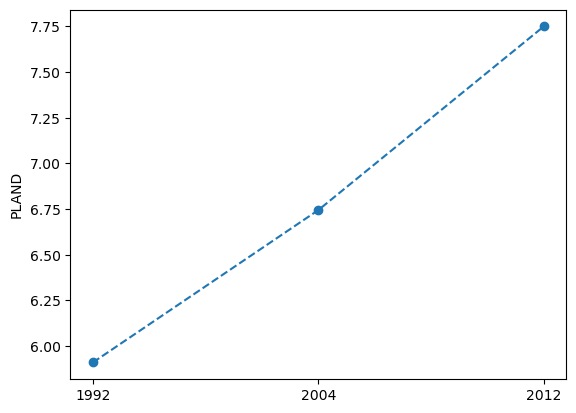

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

or we can also plot at the landscape level by not providing any `class_val` argument, e.g., the evolution of the area-weighted mean fractal dimension of all the patches of the landscape:

[########################################] | 100% Completed | 101.96 ms


<Axes: ylabel='FRAC_AM'>

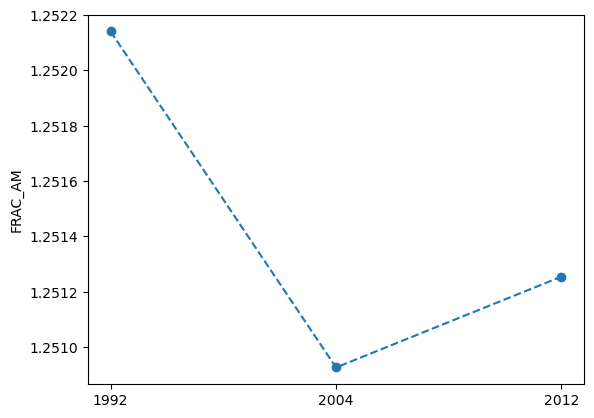

In [ ]:
sta.plot_metric("fractal_dimension_am")

<a id='zonal-analysis'></a>
## Zonal analysis

Zonal analysis is a common procedure to compute statistics for a set of specified spatial zones. PyLandStats features three classes to perform zonal analysis, `ZonalAnalysis`, `BufferAnalysis` and `ZonalGridAnalysis`. The first allows user to fully customize how the zones are defined, while `BufferAnalysis` and `ZonalGriAnalysis` provide a convenient way to instantiate specific cases of zonal analysis, i.e., adding buffers around a feature of interest or as a regular rectangular grid over the landscape, respectively. See the notebook [03-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/03-zonal-analysis.ipynb) for a thorough demonstration of the use cases described above.

To define the zones of a `ZonalAnalysis`, we can use - among other options - any geographic data file compatible with [Fiona](https://github.com/Toblerity/Fiona)). For instance, we can use a geopackage file defining three elevation zones in our landscape:

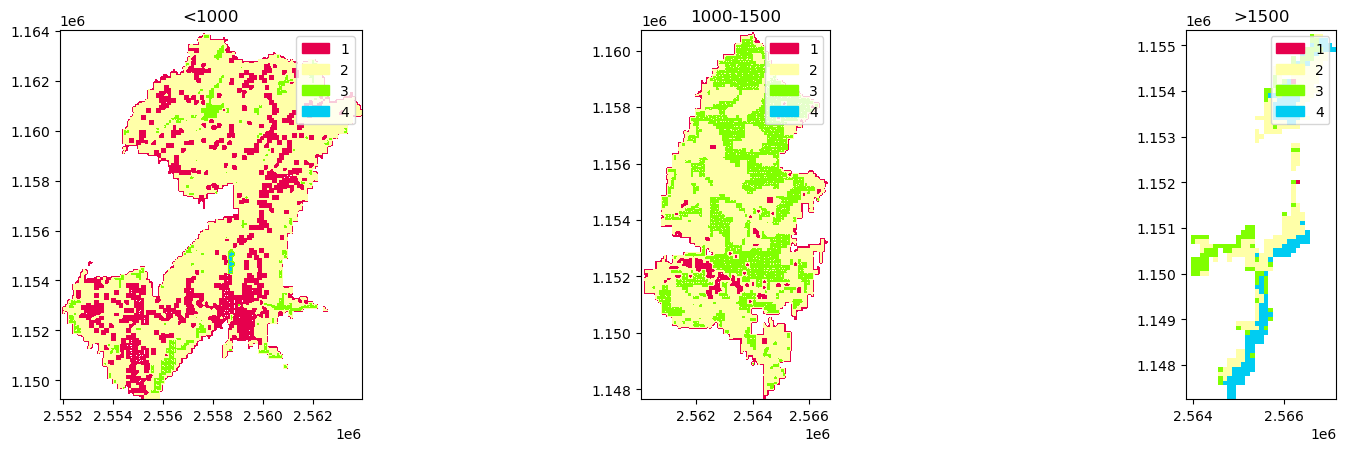

In [ ]:
elev_zones_filepath = "../data/processed/elev-zones.gpkg"

za = pls.ZonalAnalysis(input_filepath, elev_zones_filepath, zone_index="elev-zone")
# plot the landscapes of each zone
fig = za.plot_landscapes(
    cmap=sls.noas04_4_cmap, show_kwargs=dict(norm=sls.noas04_4_norm)
)

Analogously to the spatio-temporal analysis, we can use the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods to compute the metrics for each zone:

In [ ]:
za.compute_class_metrics_df()

[##########################              ] | 66% Completed | 573.09 ms

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[########################################] | 100% Completed | 673.89 ms


total_area  proportion_of_landscape  number_of_patches  \
class_val elev-zone                                                           
1         <1000           911.0                11.212308                232   
          1000-1500       117.0                 2.564103                 49   
          >1500             2.0                 0.421941                  2   
2         <1000          5621.0                69.181538                 29   
          1000-1500      1602.0                35.108481                 55   
          >1500           221.0                46.624473                 12   
3         <1000          1530.0                18.830769                226   
          1000-1500      2795.0                61.253561                 36   
          >1500           104.0                21.940928                 24   
4         <1000            63.0                 0.775385                 27   
          1000-1500        49.0                 1.073855                 35   
          >1500           147.0                31.012658                 11   

                     patch_density  largest_patch_index  total_edge  \
class_val elev-zone                                                   
1         <1000           2.855385             2.289231    219200.0   
          1000-1500       1.073855             0.460224     32200.0   
          >1500           0.421941             0.210970       500.0   
2         <1000           0.356923            66.400000    445600.0   
          1000-1500       1.205347            10.059172    192900.0   
          >1500           2.531646            17.088608     17200.0   
3         <1000           2.781538             2.633846    266400.0   
          1000-1500       0.788955            57.725181    207900.0   
          >1500           5.063291             8.227848     13800.0   
4         <1000           0.332308             0.283077     15600.0   
          1000-1500       0.767039             0.065746     16600.0   
          >1500           2.320675            14.135021     13900.0   

                     edge_density  total_core_area  \
class_val elev-zone                                  
1         <1000         26.978462             87.0   
          1000-1500      7.056761              2.0   
          >1500          1.054852              0.0   
2         <1000         54.843077           2500.0   
          1000-1500     42.274819            429.0   
          >1500         36.286920             39.0   
3         <1000         32.787692            222.0   
          1000-1500     45.562130           1373.0   
          >1500         29.113924              6.0   
4         <1000          1.920000              4.0   
          1000-1500      3.637957              0.0   
          >1500         29.324895             39.0   

                     core_area_proportion_of_landscape  \
class_val elev-zone                                      
1         <1000                               1.070769   
          1000-1500                           0.043831   
          >1500                               0.000000   
2         <1000                              30.769231   
          1000-1500                           9.401709   
          >1500                               8.227848   
3         <1000                               2.732308   
          1000-1500                          30.089853   
          >1500                               1.265823   
4         <1000                               0.049231   
          1000-1500                           0.000000   
          >1500                               8.227848   

                     number_of_disjunct_core_areas  ...  \
class_val elev-zone                                 ...   
1         <1000                                 17  ...   
          1000-1500                              2  ...   
          >1500                                  0  ...   
2         <1000                                 92  ..

In [ ]:
za.compute_landscape_metrics_df()

[########################################] | 100% Completed | 428.32 ms


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
elev-zone,,,,,,,,,,,,,,,,,,,,,
<1000,8125.0,514,6.326154,66.400000,473400.0,58.264615,2813.0,151,15.464088,3601.525292,...,223.606798,1412.451550,173.449017,60.026231,18.629139,392.314449,2.0,990.0,88.380245,474.419376
1000-1500,4563.0,175,3.835196,57.725181,224800.0,49.265834,1804.0,106,10.514706,1613.096866,...,223.606798,2216.609195,338.540438,90.844119,17.018868,171.337549,3.0,433.0,55.024862,323.316820
>1500,474.0,49,10.337553,17.088608,22700.0,47.890295,84.0,17,6.306818,47.413502,...,223.606798,2002.271555,396.321954,109.037539,4.941176,8.253731,2.0,17.0,5.578009,112.888282


We can also use the `plot_metric` method to plot the metrics computed for each zone, e.g., how the proportion of landscape occupied by the land use class value `1` (urban) changes accross elevation zones

[########################################] | 100% Completed | 101.46 ms


<Axes: ylabel='PLAND'>

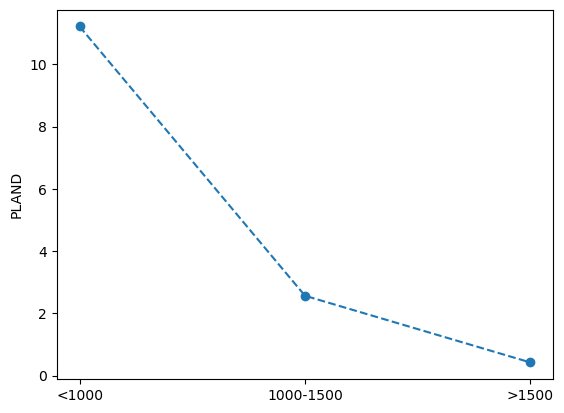

In [ ]:
za.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

Like in the spatio-temporal analysis, the plots at the landscape level can obtained by not providing any `class_val` argument.

In order to visualize such information in space, the zonal statistics can be computed in the form of a geo-data frame with the `compute_zonal_statistics_gdf` method as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density"]
zonal_statistics_gdf = za.compute_zonal_statistics_gdf(
    metrics=metrics, class_val=URBAN_CLASS_VAL
)

zonal_statistics_gdf.head()

[########################################] | 100% Completed | 100.99 ms


,edge_density,proportion_of_landscape,geometry
elev-zone,,,
1000-1500,7.056761,2.564103,"POLYGON ((2563900.000 1160700.000, 2563900.000..."
<1000,26.978462,11.212308,"MULTIPOLYGON (((2560900.000 1150500.000, 25607..."
>1500,1.054852,0.421941,"MULTIPOLYGON (((2566300.000 1151500.000, 25665..."


the computed metrics are essentially the same as those obtained using the `compute_class_metrics_df` or `compute_landscape_metrics_df` (depending on whether a `class_val` argument is provided or not), with an additional column featuring the vector geometry of each zone. This actually corresponds to a geopandas geo-data frame, and as such, we can use [its `geopandas.GeoDataFrame.explore` method](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) to obtain an interactive map as in:

In [ ]:
zonal_statistics_gdf.explore()

## Spatio-temporal zonal analysis

We might also be interested in performing the same zonal analysis at different points in time. This is why PyLandStats features an additional `SpatioTemporalZonalAnalysis` analysis class - as well as `SpatioTemporalBufferAnalysis` and `SpatioTemporalZonalGridAnalysis`. See the notebook [04-spatiotemporal-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/04-spatiotemporal-zonal-analysis.ipynb) for a more thorough demonstration.

Let us take the sequence of landscapes `input_filepaths` from [the spatio-temporal analysis above](#spatiotemporal-analysis) and let us use again the `dates` argument to specify the dates that correspond to each landscape.
Let us also take the latitude and longitude of the center of Lausanne as well as the elevation zones from [the zonal analysis above](#zonal-analysis). Now we can construct our `SpatioTemporalZonalAnalysis` instance and evaluate the sensitive of our spatio-temporal analysis to the extent of the map:

In [ ]:
stza = pls.SpatioTemporalZonalAnalysis(
    input_filepaths, elev_zones_filepath, dates=years, zone_index="elev-zone"
)

In [ ]:
stza.compute_class_metrics_df()

[#############                           ] | 33% Completed | 1.53 sms

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mamba

[##########################              ] | 66% Completed | 1.95 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[########################################] | 100% Completed | 2.16 s


total_area  proportion_of_landscape  \
class_val elev-zone date                                        
1         <1000     1992       680.0                 8.369231   
                    2004       786.0                 9.673846   
                    2012       911.0                11.212308   
          1000-1500 1992       101.0                 2.213456   
                    2004       108.0                 2.366864   
                    2012       117.0                 2.564103   
          >1500     1992         2.0                 0.421941   
                    2004         2.0                 0.421941   
                    2012         2.0                 0.421941   
2         <1000     1992      5851.0                72.012308   
                    2004      5740.0                70.646154   
                    2012      5621.0                69.181538   
          1000-1500 1992      1619.0                35.481043   
                    2004      1614.0                35.371466   
                    2012      1602.0                35.108481   
          >1500     1992       221.0                46.624473   
                    2004       222.0                46.835443   
                    2012       221.0                46.624473   
3         <1000     1992      1520.0                18.707692   
                    2004      1530.0                18.830769   
                    2012      1530.0                18.830769   
          1000-1500 1992      2785.0                61.034407   
                    2004      2791.0                61.165900   
                    2012      2795.0                61.253561   
          >1500     1992        96.0                20.253165   
                    2004       104.0                21.940928   
                    2012       104.0                21.940928   
4         <1000     1992        74.0                 0.910769   
                    2004        69.0                 0.849231   
                    2012        63.0                 0.775385   
          1000-1500 1992        58.0                 1.271094   
                    2004        50.0                 1.095770   
                    2012        49.0                 1.073855   
          >1500     1992       155.0                32.700422   
                    2004       146.0                30.801688   
                    2012       147.0                31.012658   

                          number_of_patches  patch_density  \
class_val elev-zone date                                     
1         <1000     1992                250       3.076923   
                    2004                249       3.064615   
                    2012                232       2.855385   
          1000-1500 1992                 49       1.073855   
                    2004                 47       1.030024   
                    2012                 49       1.073855   
          >1500     1992                  2       0.421941   
                    2004                  2       0.421941   
                    2012                  2       0.421941   
2         <1000     1992                 25       0.307692   
                    2004                 25       0.307692   
                    2012                 29       0.356923   
          1000-1500 1992                 51       1.117686   
                    2004                 53       1.161517   
                    2012                 55       1.205347   
          >1500     1992                 13       2.742616   
                    2004                 13       2.742616   
                    2012                 12       2.531646   
3         <1000     1992                215       2.646154   
                    2004                228       2.806154   
                    2012                226       2.781538   
          1000-1500 1992                 33       0.723208   
                    2004                 36       0.788955   
     

[########################################] | 100% Completed | 101.29 ms


<Axes: ylabel='PLAND'>

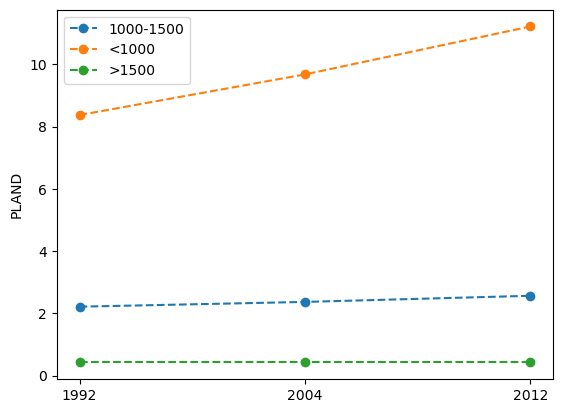

In [ ]:
stza.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)